In [1]:
import numpy as np
import sounddevice as sd
import soundfile as sf
from scipy import signal
from scipy.fftpack import fft, fftshift
import peakutils
import time
import matplotlib.pyplot as plt

In [2]:
def leOnda(arquivo):
    fs = 44100   # taxa de amostagem (sample rate)
    sd.default.samplerate = fs
    sd.default.channels = 1
    audio, samplerate = sf.read(arquivo)
    
    return audio

In [3]:
def normalize(audio):
    
    #pega o maior valor de amplitude
    maximo = max(abs(audio))
    
    resposta = []
    
    #define um contador
    contador = 0
    
    #atualiza os valores da lista audio dividindo
    #todos pelo valor máximo de pico
    for valor in audio:
        resposta.append(valor/maximo)
    
    
    return resposta 

In [4]:
def play(sinal):
    
    #frequencia do sinal
    fs = 44100
    
    #executa o som do sinal
    sd.play(sinal, fs)
    
    #função necessária 
    sd.wait()
    
    return

In [5]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 120.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [6]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

In [7]:
def determinaPicos(x, y):
    
    #determina o index
    index = peakutils.indexes(np.abs(y), thres=0.35, min_dist=50)
    
    #cria a lista de resposta
    resposta = []
    
    #salva as frequencias numa lista
    for freq in x[index]:
        resposta.append(freq)
        
    return resposta

In [8]:
def generateSin(freq, time, fs):

    #número de pontos | fs é o numero de pontos por segundo
    n = time*fs

    #eixo do tempo
    x = np.linspace(0.0, time, n)

    #cria a senoide
    s = np.sin(freq*x*2*np.pi)

    return (x, s)

In [9]:
def geraSinalModulado(portadora, sinal_desejado):
    sinal_modulado = (0+sinal_desejado)*portadora
    return sinal_modulado

In [10]:
def demodulaSinal(portadora, sinalModulado):
    sinal_resultante = portadora*sinal_modulado
    return sinal_resultante

## 1- Faz a leitura do áudio

In [11]:
#le o audio do arquivo
audio = leOnda('teste.wav')

#corta o áudio para que ele tenha exatos dois segundos (44100*2 = 88200)
audio = audio[0:88200]

In [12]:
sd.play(audio)

## 8.a Sinal Original

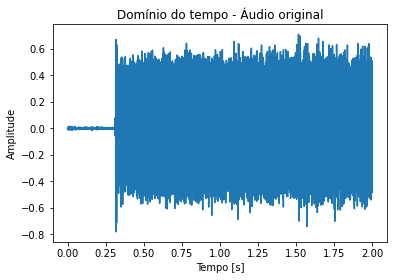

In [13]:
#cria uma linha do tempo
tempo = np.linspace(0,2,len(audio))

plt.plot(tempo, audio)
plt.title("Domínio do tempo - Áudio original")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

C:\Users\ferna\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


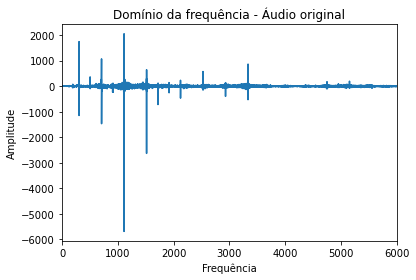

In [14]:
x_original, y_original = calcFFT(audio, 44100)

plt.plot(x_original, y_original)
plt.title("Domínio da frequência - Áudio original")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.xlim(0,6000)
plt.show()

## 2- Normaliza o áudio

In [15]:
#normaliza o audio
normalize_audio = normalize(audio)

## 3- Reproduz o áudio e verifica se está audível

In [16]:
#toca o audio para verificar se está audível
play(audio)

## 8.b Sinal normalizado

Text(0, 0.5, 'Amplitude')

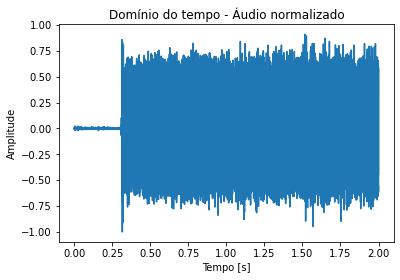

In [17]:
plt.plot(tempo, normalize_audio)
plt.title("Domínio do tempo - Áudio normalizado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

C:\Users\ferna\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

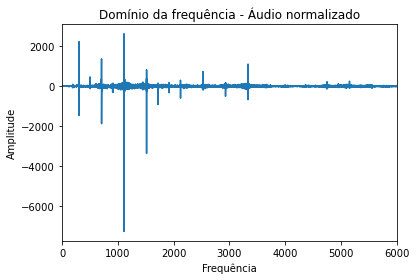

In [18]:
x_normalze, y_normalize = calcFFT(normalize_audio, 44100)

plt.plot(x_normalze, y_normalize)
plt.title("Domínio da frequência - Áudio normalizado")
plt.xlabel("Frequência")
plt.xlim(0,6000)
plt.ylabel("Amplitude")

## 4- Filtrando as frequências

In [19]:
audio_filtrado = LPF(audio, 4000, 44100)

## 5- Repoduzindo o sinal filtrado

In [20]:
play(audio_filtrado)

## 8.c- Sinal filtrado

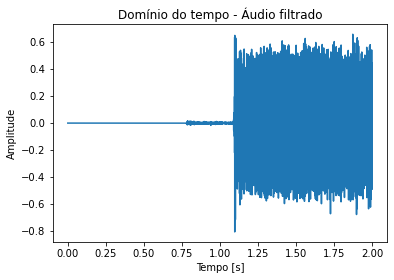

In [21]:
plt.plot(tempo, audio_filtrado)
plt.title("Domínio do tempo - Áudio filtrado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

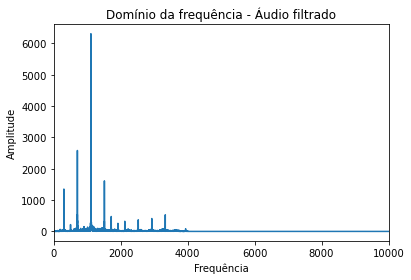

In [22]:
x_filtrado, y_filtrado = calcFFT(audio_filtrado, 44100)

plt.plot(x_filtrado, np.abs(y_filtrado))
plt.title("Domínio da frequência - Áudio filtrado")
plt.xlabel("Frequência")
plt.xlim(0,10000)
plt.ylabel("Amplitude")
plt.show()

## 6- Modulando o sinal com portadora

In [23]:
portadora = generateSin(14000, 2, 44100)

sinal_modulado = geraSinalModulado(portadora[1], audio_filtrado)

## 7- Executando sinal inaudível 

In [24]:
play(sinal_modulado)

## 8.d Sinal modulado

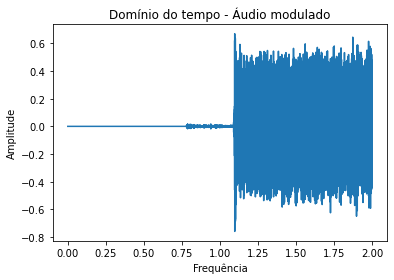

In [25]:
plt.plot(tempo, sinal_modulado)
plt.title("Domínio do tempo - Áudio modulado")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show()

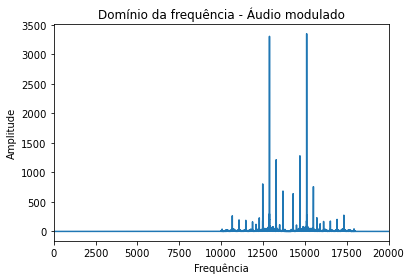

In [26]:
x_modulado, y_modulado = calcFFT(sinal_modulado, 44100)
plt.plot(x_modulado, np.abs(y_modulado))
plt.xlim(0,20000)
plt.title("Domínio da frequência - Áudio modulado")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show()


## 9- Demodulando o sinal

In [27]:
demodulado = demodulaSinal(portadora[1], sinal_modulado)

## 10- Executa o sinal demodulado

In [28]:
play(demodulado)

## 11- Gráficos no domínio do tempo e frequência

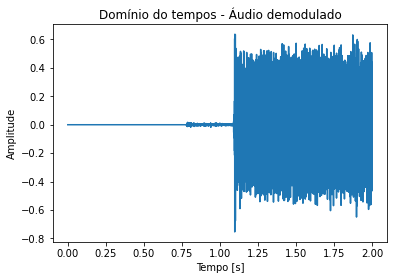

In [29]:
plt.plot(tempo, demodulado)
plt.title("Domínio do tempos - Áudio demodulado")
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

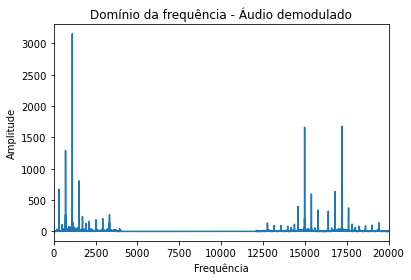

In [30]:
x_demodulado, y_demodulado = calcFFT(demodulado, 44100)
plt.plot(x_demodulado, np.abs(y_demodulado))
plt.title("Domínio da frequência - Áudio demodulado")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.xlim(0,20000)
plt.show()